In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm

In [ ]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/all_stocks_5yr.csv")
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [ ]:
data.shape

(619040, 7)

In [ ]:
data.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

In [ ]:
### How many company's data we have here?
data.Name.nunique()

505

In [ ]:
#Selecting the data AAL
df = data[data['Name']=='AAL']
df

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
1254,2018-02-01,54.00,54.64,53.59,53.88,3623078,AAL
1255,2018-02-02,53.49,53.99,52.03,52.10,5109361,AAL
1256,2018-02-05,51.99,52.39,49.75,49.76,6878284,AAL
1257,2018-02-06,49.32,51.50,48.79,51.18,6782480,AAL


In [ ]:
df.shape

(1259, 7)

In [ ]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

In [ ]:
#Select the columns date and close price
df = df[['date','close']]
df

,date,close
0,2013-02-08,14.75
1,2013-02-11,14.46
2,2013-02-12,14.27
3,2013-02-13,14.66
4,2013-02-14,13.99
...,...,...
1254,2018-02-01,53.88
1255,2018-02-02,52.10
1256,2018-02-05,49.76
1257,2018-02-06,51.18


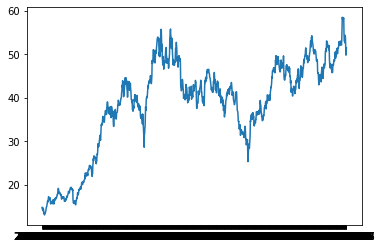

In [ ]:
#Line plot
import matplotlib.pyplot as plt
plt.plot(df['date'],df['close'])

In [ ]:
df.date[:10]

0    2013-02-08
1    2013-02-11
2    2013-02-12
3    2013-02-13
4    2013-02-14
5    2013-02-15
6    2013-02-19
7    2013-02-20
8    2013-02-21
9    2013-02-22
Name: date, dtype: object

In [ ]:
#Checking the missing values
df.isnull().sum()

date     0
close    0
dtype: int64

In [ ]:
df.shape[0]

1259

In [ ]:
#Preparing the data
#Features and target
#Input and output
## Last 7 days data as input
## X -- [[d1,d7],[d9,d15],[d17,d23]] 
## y -- [d8,d16,d24,...]
#X = [[d1-d7],[d2-d8],]
#y = [d8,d9]
rows = df.shape[0]//8
X = [] #input
y = [] #output
for i in range(df.shape[0]-7-1):
  X.append(df['close'][i:i+7]) #0 -->[0:7], 1-->[1:8]
  y.append(df['close'][i+7]) #7,8,9  
print(X[:2])

[0    14.75
1    14.46
2    14.27
3    14.66
4    13.99
5    14.50
6    14.26
Name: close, dtype: float64, 1    14.46
2    14.27
3    14.66
4    13.99
5    14.50
6    14.26
7    13.33
Name: close, dtype: float64]


In [ ]:
y

[13.33,
 13.37,
 13.57,
 13.02,
 13.26,
 13.41,
 13.43,
 13.61,
 13.9,
 14.05,
 14.57,
 14.82,
 14.92,
 15.13,
 15.5,
 15.91,
 16.25,
 15.98,
 16.29,
 16.78,
 17.23,
 17.0,
 16.86,
 16.6,
 16.51,
 16.65,
 16.97,
 16.67,
 15.74,
 15.53,
 15.69,
 15.72,
 15.84,
 15.7,
 15.78,
 16.19,
 16.14,
 15.59,
 16.37,
 16.52,
 16.1,
 16.02,
 15.52,
 16.3,
 16.45,
 16.22,
 16.59,
 16.81,
 16.9,
 16.6,
 16.94,
 17.02,
 17.0,
 16.98,
 17.34,
 17.38,
 17.76,
 17.72,
 18.1,
 18.81,
 19.12,
 19.01,
 18.59,
 17.95,
 17.93,
 18.19,
 18.21,
 18.12,
 17.83,
 17.67,
 17.57,
 17.73,
 17.65,
 16.95,
 16.64,
 17.02,
 17.26,
 16.92,
 16.88,
 17.01,
 16.93,
 16.95,
 17.22,
 17.06,
 16.73,
 16.34,
 16.13,
 16.46,
 16.17,
 16.31,
 16.42,
 16.8,
 16.43,
 16.75,
 16.84,
 16.94,
 17.36,
 17.17,
 17.37,
 17.56,
 17.76,
 17.95,
 18.45,
 18.42,
 18.23,
 18.15,
 18.05,
 18.5,
 18.83,
 19.09,
 19.23,
 19.2,
 19.35,
 19.38,
 18.92,
 19.17,
 18.92,
 18.87,
 18.98,
 18.6,
 18.82,
 16.36,
 16.17,
 15.72,
 16.01,
 15.64,
 15.8,


In [ ]:
df1 = pd.DataFrame(X,columns=['d1','d2','d3','d4','d5','d6','d7'])
df1.head()

,d1,d2,d3,d4,d5,d6,d7
close,NaN,NaN,NaN,NaN,NaN,NaN,NaN
close,NaN,NaN,NaN,NaN,NaN,NaN,NaN
close,NaN,NaN,NaN,NaN,NaN,NaN,NaN
close,NaN,NaN,NaN,NaN,NaN,NaN,NaN
close,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
X

[0    14.75
 1    14.46
 2    14.27
 3    14.66
 4    13.99
 5    14.50
 6    14.26
 Name: close, dtype: float64, 1    14.46
 2    14.27
 3    14.66
 4    13.99
 5    14.50
 6    14.26
 7    13.33
 Name: close, dtype: float64, 2    14.27
 3    14.66
 4    13.99
 5    14.50
 6    14.26
 7    13.33
 8    13.37
 Name: close, dtype: float64, 3    14.66
 4    13.99
 5    14.50
 6    14.26
 7    13.33
 8    13.37
 9    13.57
 Name: close, dtype: float64, 4     13.99
 5     14.50
 6     14.26
 7     13.33
 8     13.37
 9     13.57
 10    13.02
 Name: close, dtype: float64, 5     14.50
 6     14.26
 7     13.33
 8     13.37
 9     13.57
 10    13.02
 11    13.26
 Name: close, dtype: float64, 6     14.26
 7     13.33
 8     13.37
 9     13.57
 10    13.02
 11    13.26
 12    13.41
 Name: close, dtype: float64, 7     13.33
 8     13.37
 9     13.57
 10    13.02
 11    13.26
 12    13.41
 13    13.43
 Name: close, dtype: float64, 8     13.37
 9     13.57
 10    13.02
 11    13.26
 12    13.41
 13

In [ ]:
type(X[0])

pandas.core.series.Series

In [ ]:
X = np.array(X)

In [ ]:
df1 = pd.DataFrame(X,columns=['d1','d2','d3','d4','d5','d6','d7'])
df1.head()

,d1,d2,d3,d4,d5,d6,d7
0,14.75,14.46,14.27,14.66,13.99,14.50,14.26
1,14.46,14.27,14.66,13.99,14.50,14.26,13.33
2,14.27,14.66,13.99,14.50,14.26,13.33,13.37
3,14.66,13.99,14.50,14.26,13.33,13.37,13.57
4,13.99,14.50,14.26,13.33,13.37,13.57,13.02


In [ ]:
df1['d8'] = y
df1.head()

,d1,d2,d3,d4,d5,d6,d7,d8
0,14.75,14.46,14.27,14.66,13.99,14.50,14.26,13.33
1,14.46,14.27,14.66,13.99,14.50,14.26,13.33,13.37
2,14.27,14.66,13.99,14.50,14.26,13.33,13.37,13.57
3,14.66,13.99,14.50,14.26,13.33,13.37,13.57,13.02
4,13.99,14.50,14.26,13.33,13.37,13.57,13.02,13.26


In [ ]:
df.close[:15]

0     14.75
1     14.46
2     14.27
3     14.66
4     13.99
5     14.50
6     14.26
7     13.33
8     13.37
9     13.57
10    13.02
11    13.26
12    13.41
13    13.43
14    13.61
Name: close, dtype: float64

In [ ]:
df1.shape

(1251, 8)

In [ ]:
#for i in range(df.shape[0]-7-1):
 # X.append(df['close'][i:i+7]) #0 -->[0:7], 1-->[1:8]
 # y.append(df['close'][i+7]) #7,8,9  
#print(X[:2])

In [ ]:
1251 * 0.2

250.20000000000002

In [ ]:
## train test split
X_train = df1.iloc[0:1000,0:7]
X_test = df1.iloc[1000:,0:7]
y_train = df1['d8'][:1000]
y_test = df1['d8'][1000:]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1000, 7)
(1000,)
(251, 7)
(251,)


In [ ]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_sc = pd.DataFrame(sc.transform(X_train),columns = X_train.columns)
X_test_sc = pd.DataFrame(sc.transform(X_test),columns = X_train.columns)
X_train_sc.describe()

,d1,d2,d3,d4,d5,d6,d7
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,5.107026e-17,1.179057e-16,3.196332e-16,8.437695e-18,-2.058353e-16,6.408207e-16,3.573808e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-2.119798e+00,-2.125939e+00,-2.132307e+00,-2.138824e+00,-2.145197e+00,-2.151939e+00,-2.158392e+00
25%,-5.582080e-01,-5.486430e-01,-5.493180e-01,-5.516601e-01,-5.450605e-01,-5.350756e-01,-5.332242e-01
50%,2.659776e-01,2.649882e-01,2.640589e-01,2.640761e-01,2.641178e-01,2.631759e-01,2.621305e-01
75%,6.620601e-01,6.644832e-01,6.649275e-01,6.633158e-01,6.633343e-01,6.668651e-01,6.666995e-01
max,1.847059e+00,1.847165e+00,1.847513e+00,1.847976e+00,1.848369e+00,1.848914e+00,1.849089e+00


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
model = Sequential()
model.add(LSTM(256,input_shape=(7,1)))
model.add(Dense(1))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss = 'mse')

In [ ]:
X_test.shape

(251, 7)

In [ ]:
#no.of records, time steps, features
X_train_sc = X_train_sc.values.reshape(1000,7,1)
X_test_sc = X_test_sc.values.reshape(251,7,1)

In [ ]:
history = model.fit(X_train_sc,y_train, epochs = 100,validation_data=(X_test_sc,y_test))

Train on 1000 samples, validate on 251 samples
Epoch 1/100
1000/1000 [==============================] - 1s 1ms/step - loss: 1015.7008 - val_loss: 659.4253
Epoch 2/100
1000/1000 [==============================] - 1s 979us/step - loss: 242.1914 - val_loss: 309.6253
Epoch 3/100
1000/1000 [==============================] - 1s 971us/step - loss: 123.1624 - val_loss: 200.2775
Epoch 4/100
1000/1000 [==============================] - 1s 990us/step - loss: 114.0456 - val_loss: 169.0207
Epoch 5/100
1000/1000 [==============================] - 1s 1ms/step - loss: 113.1718 - val_loss: 164.6232
Epoch 6/100
1000/1000 [==============================] - 1s 964us/step - loss: 112.9504 - val_loss: 162.6915
Epoch 7/100
1000/1000 [==============================] - 1s 996us/step - loss: 112.4794 - val_loss: 161.5012
Epoch 8/100
1000/1000 [==============================] - 1s 967us/step - loss: 111.6822 - val_loss: 165.4003
Epoch 9/100
1000/1000 [==============================] - 1s 1ms/step - loss: 109.813

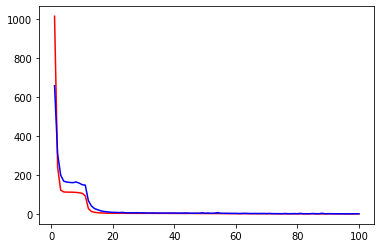

In [ ]:
tr_loss = history.history['loss']
val_loss = history.history['val_loss']
ep = list(range(1,101))
plt.plot(ep,tr_loss, color = 'r')
plt.plot(ep,val_loss, color = 'b')

In [ ]:
model.predict(X_test_sc)

array([[44.45444 ],
       [44.693542],
       [45.208805],
       [45.637024],
       [46.350147],
       [46.464035],
       [46.85058 ],
       [46.78896 ],
       [46.73198 ],
       [46.59389 ],
       [46.292156],
       [46.009693],
       [45.84876 ],
       [45.832787],
       [45.89182 ],
       [46.23765 ],
       [45.96759 ],
       [46.15693 ],
       [45.616447],
       [45.08002 ],
       [44.600613],
       [43.70993 ],
       [43.36632 ],
       [42.53933 ],
       [41.613277],
       [41.2061  ],
       [41.22323 ],
       [41.314007],
       [41.288994],
       [40.716026],
       [40.164074],
       [40.247944],
       [40.750282],
       [41.178387],
       [41.68507 ],
       [41.743523],
       [41.90112 ],
       [41.872173],
       [41.929367],
       [41.307625],
       [40.91483 ],
       [40.84966 ],
       [41.08102 ],
       [41.486515],
       [42.400673],
       [43.11428 ],
       [43.27263 ],
       [43.49111 ],
       [43.432995],
       [43.649216],


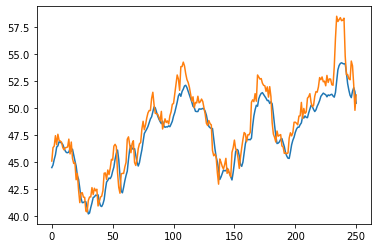

In [ ]:
plt.plot(range(len(X_test_sc)),model.predict(X_test_sc).flat)
plt.plot(range(len(X_test_sc)),y_test)

In [ ]:
X_test_sc[0].reshape(1,7,1)

array([[[0.83910218],
        [0.77719701],
        [0.75711333],
        [0.75193205],
        [0.7682191 ],
        [0.86976278],
        [0.85612661]]])

In [ ]:
model.predict(X_test_sc[0].reshape(1,7,1))

array([[44.454422]], dtype=float32)

In [ ]:
y_test[1000]

45.06

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
model2 = Sequential()
# 256 cels
model2.add(LSTM(256,input_shape=(7,1)))
model2.add(Dropout(0.3))
# single neuron
model2.add(Dense(1))
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(optimizer='adam',loss='mse')

In [ ]:
history2 = model.fit(X_train_sc,y_train,epochs=100,validation_data=(X_test_sc,y_test))

Train on 1000 samples, validate on 251 samples
Epoch 1/100
1000/1000 [==============================] - 1s 974us/step - loss: 1.5117 - val_loss: 1.6848
Epoch 2/100
1000/1000 [==============================] - 1s 996us/step - loss: 1.3270 - val_loss: 1.6932
Epoch 3/100
1000/1000 [==============================] - 1s 985us/step - loss: 1.2663 - val_loss: 1.7082
Epoch 4/100
1000/1000 [==============================] - 1s 976us/step - loss: 1.2497 - val_loss: 1.7888
Epoch 5/100
1000/1000 [==============================] - 1s 1ms/step - loss: 1.2442 - val_loss: 1.6916
Epoch 6/100
1000/1000 [==============================] - 1s 972us/step - loss: 1.2913 - val_loss: 1.5301
Epoch 7/100
1000/1000 [==============================] - 1s 975us/step - loss: 1.2292 - val_loss: 1.4913
Epoch 8/100
1000/1000 [==============================] - 1s 968us/step - loss: 1.2437 - val_loss: 1.5783
Epoch 9/100
1000/1000 [==============================] - 1s 960us/step - loss: 1.2032 - val_loss: 1.6795
Epoch 10/1

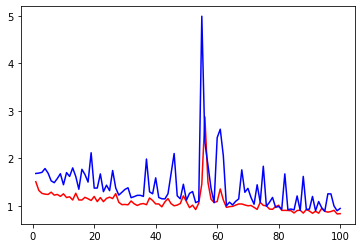

In [ ]:
tr_loss = history2.history['loss']
val_loss = history2.history['val_loss']
ep = list(range(1,101))
plt.plot(ep,tr_loss,color='r')
plt.plot(ep,val_loss,color='b')

# Get the data
#what is the target
#Take the target and observe downtrend or uptrend
#Craete input(features) and ouputs(target)
#Train_test_split
##Reshape the inputs
#Create a Model
#Compile the model with the proper optimizer and loss
#Metrics =['mse','mae']
#Evaluate the model with test data
##compare the results
#Check for overfitting and underfitting
#If It is an overfitted model apply dropout. or check another model
#Check raw data